In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/CodeClusters/Credit-Card-Dataset-Clustering/main/CC%20GENERAL.csv'
df = pd.read_csv(url)
data=df


In [5]:
# Customer ID is definitely have no meaning at all in terms of building a clustering model (or any prediction model).
# So the first thing we want to do it to drop this customer Id column.
data.drop(['CUST_ID'], axis=1, inplace=True)

In [6]:
# As a next step, we would also like to see how many null values are there, and if there is one, we will need to handle them.
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# The easiest way to handle the columns with null values is either to drop those rows, or fill with mean value.
# Here, we would just fill it with mean value
data = data.fillna(data.mean())

# Verify all the columns are filled
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
# K-mean clustering model uses "distances" between data points to put them into groups
# Logically, for it to work well, we will need to standardize the unit of the "distances"
# Therefore, we would like to scale the dataset. Here, again, we would use the one of the most commonly used method - StandardScaler.
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)

In [9]:
from sklearn.cluster import KMeans

# Let's start with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=0)

In [10]:
# Usually after building the model, you would like to evaluate it with different metrics
# In general:
# Decreasing the WCSS is the key objective
# Silhouette coefficient should be nearer to +1
# Lower the value of Davies-Bouldin Index would improve the performance.

# We are not going to go through these metrics here. If you are interested, please do read about the math behind these metrics.

from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

labels = kmeans.fit_predict(data)

print("Silhouette Coefficient: %0.3f" % silhouette_score(data, labels))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(data, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(data, labels))

Silhouette Coefficient: 0.398
Calinski-Harabasz Index: 2685.157
Davies-Bouldin Index: 1.403


In [11]:
# Usually people would use Elbow Method with WCSS (Within-Cluster Sum of Square).
# We would also start with that

# To do that, we would need to build multiple models with varying "number of clusters (i.e. K)"
# We can extract the wcss value from the model by using the inertia_ field
# We would then put value of WCSS in each of model into an array and visualize them later

wcss = []

for i in range(2, 16): 
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(data) 
    wcss.append(kmeans.inertia_)
    

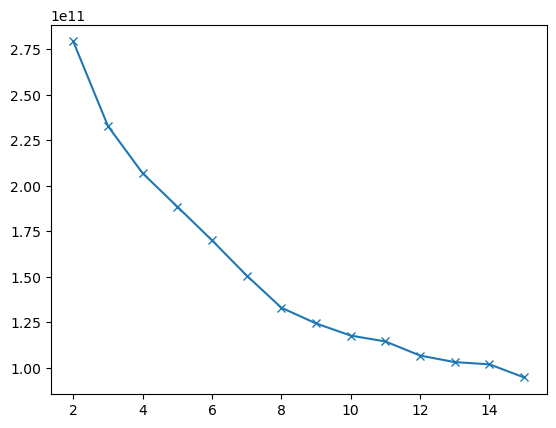

In [12]:
# After having the series of WCSS values, we can then plot it out, and see what is the optimal K value.

import matplotlib.pyplot as plt

kvalue = range(2, 16)
plt.plot(kvalue, wcss, marker='x')
plt.show()

In [13]:
# Let's try to plot other metrics in the same chart as well

silhouette = []
davies_bouldin = []

for i in range(2, 16): 
    kmeans = KMeans(n_clusters = i, random_state = 0)
    labels = kmeans.fit_predict(data)
    silhouette.append(silhouette_score(data, labels))
    davies_bouldin.append(davies_bouldin_score(data, labels))

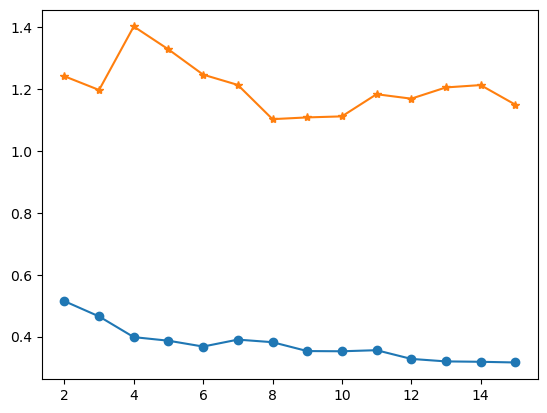

In [14]:
kvalue = range(2, 16)
plt.plot(kvalue, silhouette, marker='o')
plt.plot(kvalue, davies_bouldin, marker='*')
plt.show()